In [105]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths



In [106]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# CLIMATE FACTOR TESTS

## Grounding Line plotting - Climate Factor 0.1

In [107]:
gl_run_title_cf01 = str("Grounding Line Evolution Over Time - Climate Factor = 0.1")
cf_01 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run1_cf0.1/DATA_Dictionary_2025_03_12__11_29_05.pkl.gz"
with gzip.open(cf_01, 'rb') as f:
    DATA_dict_cf_01 = pickle.load(f)

In [108]:
bed_dict = DATA_dict_cf_01['bed_dict']
base_dict = DATA_dict_cf_01['base_dict']
surf_dict= DATA_dict_cf_01 ['surf_dict']
sed_dict = DATA_dict_cf_01['sed_dict']
H_dict = DATA_dict_cf_01['H_dict']
us_dict = DATA_dict_cf_01['us_dict']
ub_dict = DATA_dict_cf_01['ub_dict']
Hs_dict = DATA_dict_cf_01['Hs_dict']
GL_dict = DATA_dict_cf_01['GL_dict']
Qs_dict = DATA_dict_cf_01['Qs_dict']

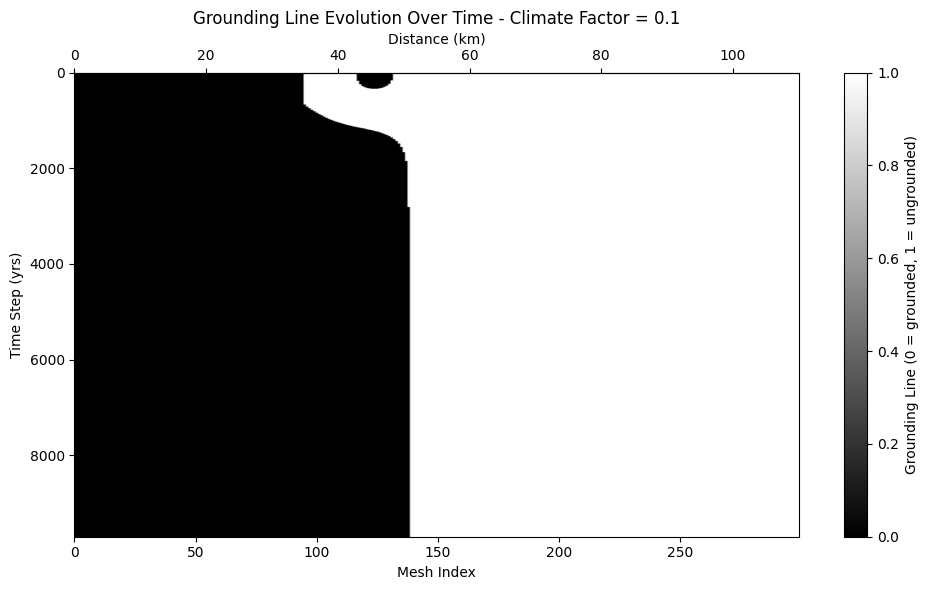

In [109]:
GL_dict = DATA_dict_cf_01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [110]:
gl_positions_cf_01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_01.append(idx)

gl_positions_cf_01 = np.array(gl_positions_cf_01)
GL_km_cf_01 = mesh_index_to_km(gl_positions_cf_01)

/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


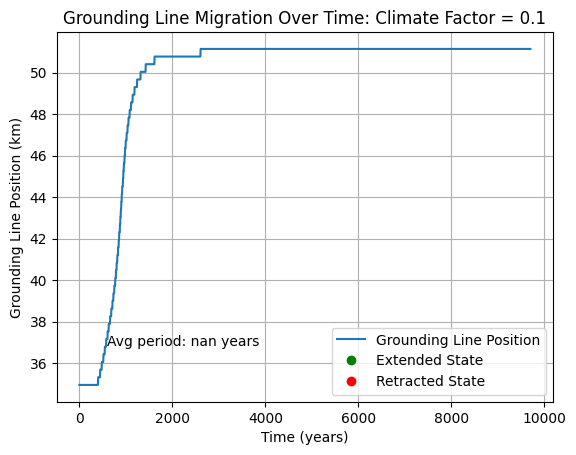

Mean cycle period: nan years
[]
Mean advance amplitude: nan km
[]
Mean retreat amplitude: nan km
[]


In [111]:
cf_01_peaks, _ = find_peaks(GL_km_cf_01, prominence=2) 
cf_01_troughs, _ = find_peaks(-GL_km_cf_01, prominence=2)     
cf_01_periods = np.diff(np.array(time)[cf_01_peaks])
cf_01_adv_dists = GL_km_cf_01[cf_01_peaks]
cf_01_ret_dists = GL_km_cf_01[cf_01_troughs]


plt.plot(time, GL_km_cf_01, label='Grounding Line Position')
plt.plot(np.array(time)[cf_01_peaks], GL_km_cf_01[cf_01_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_01_troughs], GL_km_cf_01[cf_01_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_01_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.1")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_01_periods):.2f} years")
print(cf_01_periods)

print(f"Mean advance amplitude: {np.mean(cf_01_adv_dists):.2f} km")
print(cf_01_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_01_ret_dists):.2f} km")
print(cf_01_ret_dists)


## Grounding Line plotting - Climate Factor 0.2

In [112]:
gl_run_title_cf02 = str("Grounding Line Evolution Over Time - Climate Factor = 0.2")
cf_02 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run2_cf0.2/DATA_Dictionary_2025_03_12__13_03_36.pkl.gz"
with gzip.open(cf_02, 'rb') as f:
    DATA_dict_cf_02 = pickle.load(f)

In [113]:
bed_dict = DATA_dict_cf_02['bed_dict']
base_dict = DATA_dict_cf_02['base_dict']
surf_dict= DATA_dict_cf_02 ['surf_dict']
sed_dict = DATA_dict_cf_02['sed_dict']
H_dict = DATA_dict_cf_02['H_dict']
us_dict = DATA_dict_cf_02['us_dict']
ub_dict = DATA_dict_cf_02['ub_dict']
Hs_dict = DATA_dict_cf_02['Hs_dict']
GL_dict = DATA_dict_cf_02['GL_dict']
Qs_dict = DATA_dict_cf_02['Qs_dict']

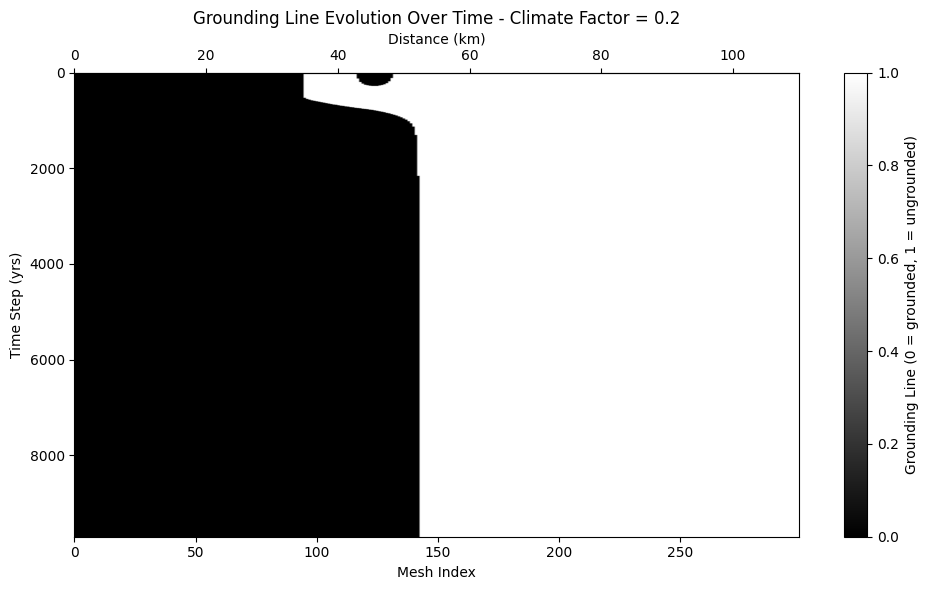

In [114]:
GL_dict = DATA_dict_cf_02['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf02)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [115]:
gl_positions_cf_02 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_02.append(idx)

gl_positions_cf_02 = np.array(gl_positions_cf_02)
GL_km_cf_02 = mesh_index_to_km(gl_positions_cf_02)

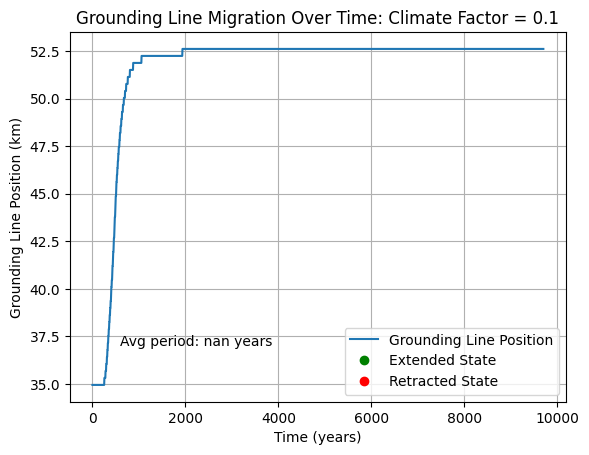

Mean cycle period: nan years
[]
Mean advance amplitude: nan km
[]
Mean retreat amplitude: nan km
[]


In [116]:
cf_02_peaks, _ = find_peaks(GL_km_cf_02, prominence=2) 
cf_02_troughs, _ = find_peaks(-GL_km_cf_02, prominence=2)     
cf_02_periods = np.diff(np.array(time)[cf_02_peaks])
cf_02_adv_dists = GL_km_cf_02[cf_02_peaks]
cf_02_ret_dists = GL_km_cf_02[cf_02_troughs]


plt.plot(time, GL_km_cf_02, label='Grounding Line Position')
plt.plot(np.array(time)[cf_02_peaks], GL_km_cf_02[cf_02_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_02_troughs], GL_km_cf_02[cf_02_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_02_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.1")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_02_periods):.2f} years")
print(cf_02_periods)

print(f"Mean advance amplitude: {np.mean(cf_02_adv_dists):.2f} km")
print(cf_02_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_02_ret_dists):.2f} km")
print(cf_02_ret_dists)


## Grounding Line plotting - Climate Factor 0.3

In [117]:
gl_run_title_cf03 = str("Grounding Line Evolution Over Time - Climate Factor = 0.3")
cf_03 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run3_cf0.3/DATA_Dictionary_2025_03_12__14_25_35.pkl.gz"
with gzip.open(cf_03, 'rb') as f:
    DATA_dict_cf_03 = pickle.load(f)

In [118]:
bed_dict = DATA_dict_cf_03['bed_dict']
base_dict = DATA_dict_cf_03['base_dict']
surf_dict= DATA_dict_cf_03 ['surf_dict']
sed_dict = DATA_dict_cf_03['sed_dict']
H_dict = DATA_dict_cf_03['H_dict']
us_dict = DATA_dict_cf_03['us_dict']
ub_dict = DATA_dict_cf_03['ub_dict']
Hs_dict = DATA_dict_cf_03['Hs_dict']
GL_dict = DATA_dict_cf_03['GL_dict']
Qs_dict = DATA_dict_cf_03['Qs_dict']

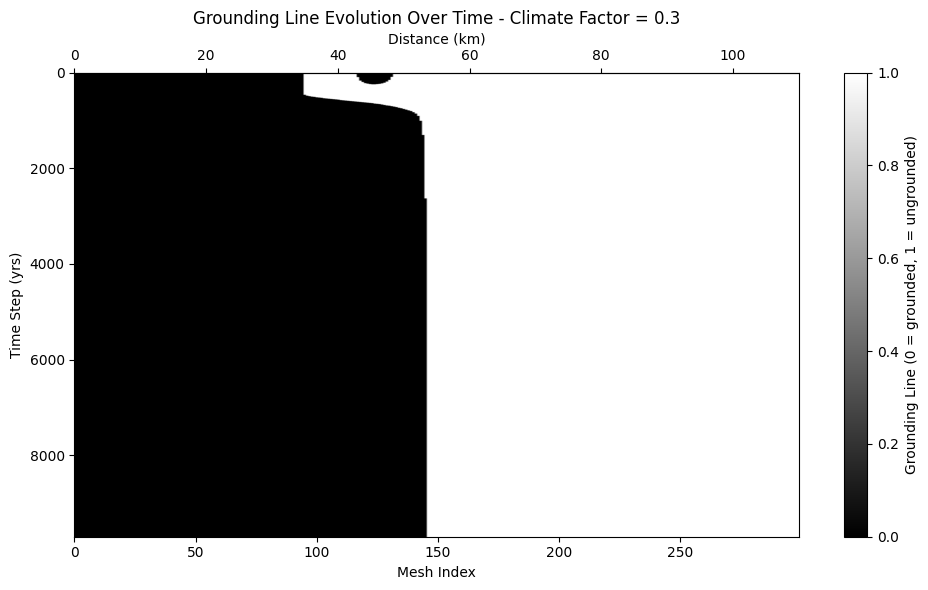

In [119]:
GL_dict = DATA_dict_cf_03['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf03)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Climate Factor 0.4

In [120]:
gl_run_title_cf04 = str("Grounding Line Evolution Over Time - Climate Factor = 0.4")
cf_04 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run4_cf0.4/DATA_Dictionary_2025_03_12__14_52_10.pkl.gz"
with gzip.open(cf_04, 'rb') as f:
    DATA_dict_cf_04 = pickle.load(f)

In [121]:
bed_dict = DATA_dict_cf_04['bed_dict']
base_dict = DATA_dict_cf_04['base_dict']
surf_dict= DATA_dict_cf_04 ['surf_dict']
sed_dict = DATA_dict_cf_04['sed_dict']
H_dict = DATA_dict_cf_04['H_dict']
us_dict = DATA_dict_cf_04['us_dict']
ub_dict = DATA_dict_cf_04['ub_dict']
Hs_dict = DATA_dict_cf_04['Hs_dict']
GL_dict = DATA_dict_cf_04['GL_dict']
Qs_dict = DATA_dict_cf_04['Qs_dict']

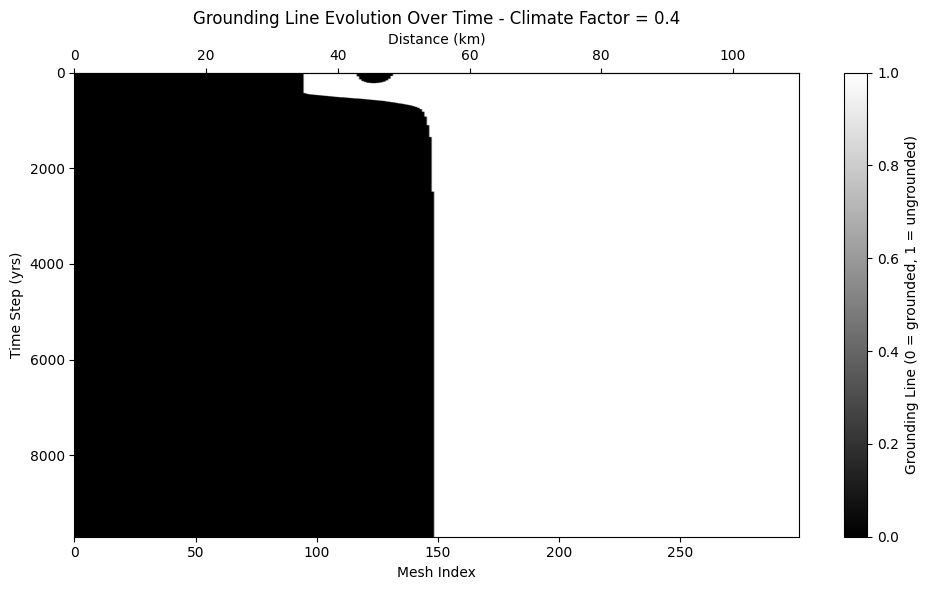

In [122]:
GL_dict = DATA_dict_cf_04['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf04)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Climate Factor 0.5

In [123]:
gl_run_title_cf05 = str("Grounding Line Evolution Over Time - Climate Factor = 0.5")
cf_05 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run5_cf0.5/DATA_Dictionary_2025_03_13__12_47_05.pkl.gz"
with gzip.open(cf_05, 'rb') as f:
    DATA_dict_cf_05 = pickle.load(f)

In [124]:
bed_dict = DATA_dict_cf_05['bed_dict']
base_dict = DATA_dict_cf_05['base_dict']
surf_dict= DATA_dict_cf_05 ['surf_dict']
sed_dict = DATA_dict_cf_05['sed_dict']
H_dict = DATA_dict_cf_05['H_dict']
us_dict = DATA_dict_cf_05['us_dict']
ub_dict = DATA_dict_cf_05['ub_dict']
Hs_dict = DATA_dict_cf_05['Hs_dict']
GL_dict = DATA_dict_cf_05['GL_dict']
Qs_dict = DATA_dict_cf_05['Qs_dict']

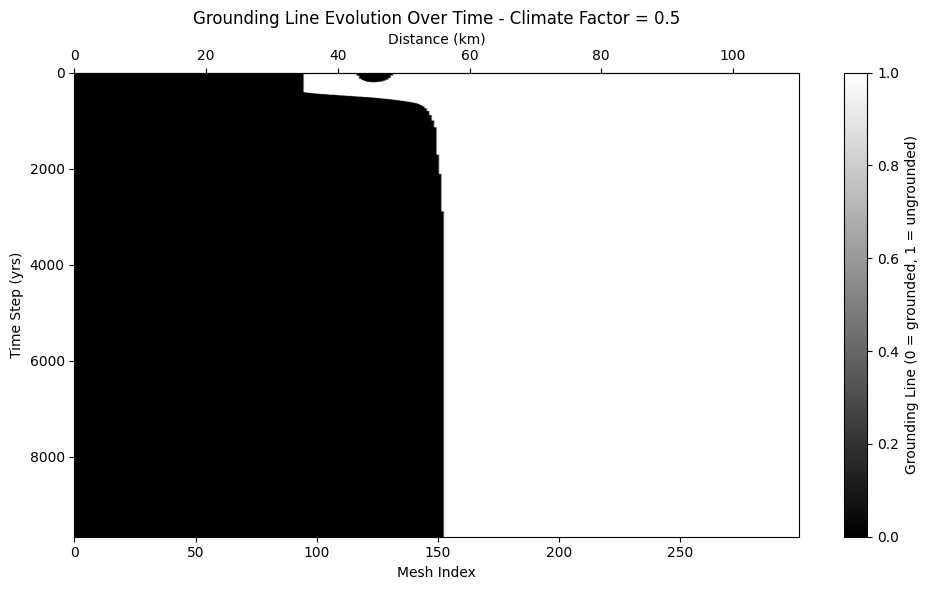

In [125]:
GL_dict = DATA_dict_cf_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

## Grounding Line plotting - Climate Factor 0.6

In [126]:
gl_run_title_cf06 = str("Grounding Line Evolution Over Time - Climate Factor = 0.6")
cf_06 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_24__14_28_17_CF06.pkl.gz"
with gzip.open(cf_06, 'rb') as f:
    DATA_dict_cf_06 = pickle.load(f)

In [127]:
bed_dict = DATA_dict_cf_06['bed_dict']
base_dict = DATA_dict_cf_06['base_dict']
surf_dict= DATA_dict_cf_06 ['surf_dict']
sed_dict = DATA_dict_cf_06['sed_dict']
H_dict = DATA_dict_cf_06['H_dict']
us_dict = DATA_dict_cf_06['us_dict']
ub_dict = DATA_dict_cf_06['ub_dict']
Hs_dict = DATA_dict_cf_06['Hs_dict']
GL_dict = DATA_dict_cf_06['GL_dict']
Qs_dict = DATA_dict_cf_06['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.225981836746


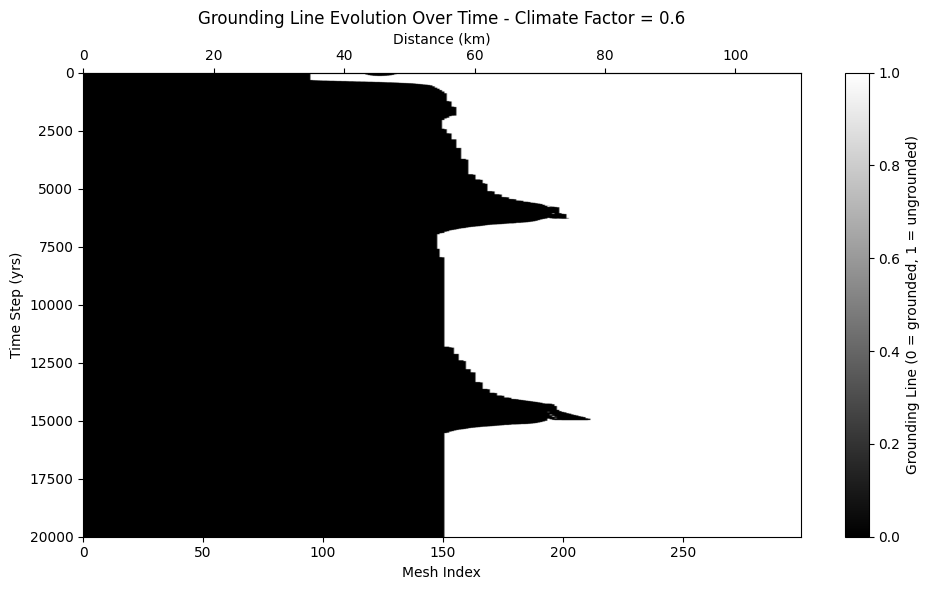

In [128]:
GL_dict = DATA_dict_cf_06['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf06)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [129]:
gl_positions_cf_06 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_06.append(idx)

gl_positions_cf_06 = np.array(gl_positions_cf_06)
GL_km_cf_06 = mesh_index_to_km(gl_positions_cf_06)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_06 = GL_km_cf_06[mask]

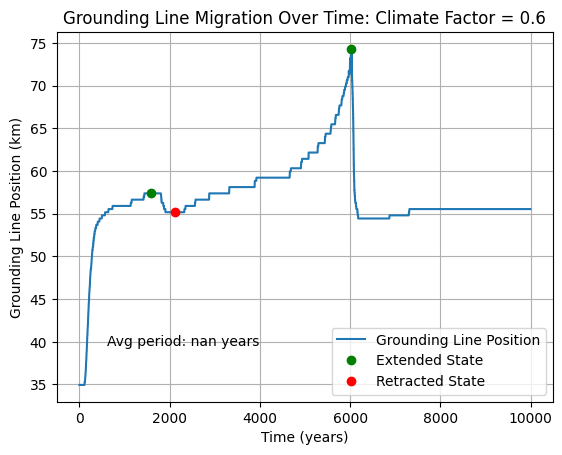

Mean cycle period: nan years
[]
Mean advance amplitude: 65.85 km
[57.39130435 74.31438127]
Mean retreat amplitude: 55.18 km
[55.18394649]


In [130]:
cf_06_peaks, _ = find_peaks(GL_km_cf_06, prominence=2) 
cf_06_troughs, _ = find_peaks(-GL_km_cf_06, prominence=2)     
cf_06_periods = np.diff(np.array(time)[cf_06_troughs])
cf_06_adv_dists = GL_km_cf_06[cf_06_peaks]
cf_06_ret_dists = GL_km_cf_06[cf_06_troughs]


plt.plot(time, GL_km_cf_06, label='Grounding Line Position')
plt.plot(np.array(time)[cf_06_peaks], GL_km_cf_06[cf_06_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_06_troughs], GL_km_cf_06[cf_06_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_06_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.6")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_06_periods):.2f} years")
print(cf_06_periods)

print(f"Mean advance amplitude: {np.mean(cf_06_adv_dists):.2f} km")
print(cf_06_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_06_ret_dists):.2f} km")
print(cf_06_ret_dists)


## Grounding Line plotting - Climate Factor 0.7

In [131]:
gl_run_title_cf07 = str("Grounding Line Evolution Over Time - Climate Factor = 0.7")
cf_07 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_24__15_03_00_CF07.pkl.gz"
with gzip.open(cf_07, 'rb') as f:
    DATA_dict_cf_07 = pickle.load(f)

In [132]:
bed_dict = DATA_dict_cf_07['bed_dict']
base_dict = DATA_dict_cf_07['base_dict']
surf_dict= DATA_dict_cf_07 ['surf_dict']
sed_dict = DATA_dict_cf_07['sed_dict']
H_dict = DATA_dict_cf_07['H_dict']
us_dict = DATA_dict_cf_07['us_dict']
ub_dict = DATA_dict_cf_07['ub_dict']
Hs_dict = DATA_dict_cf_07['Hs_dict']
GL_dict = DATA_dict_cf_07['GL_dict']
Qs_dict = DATA_dict_cf_07['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.8776469031


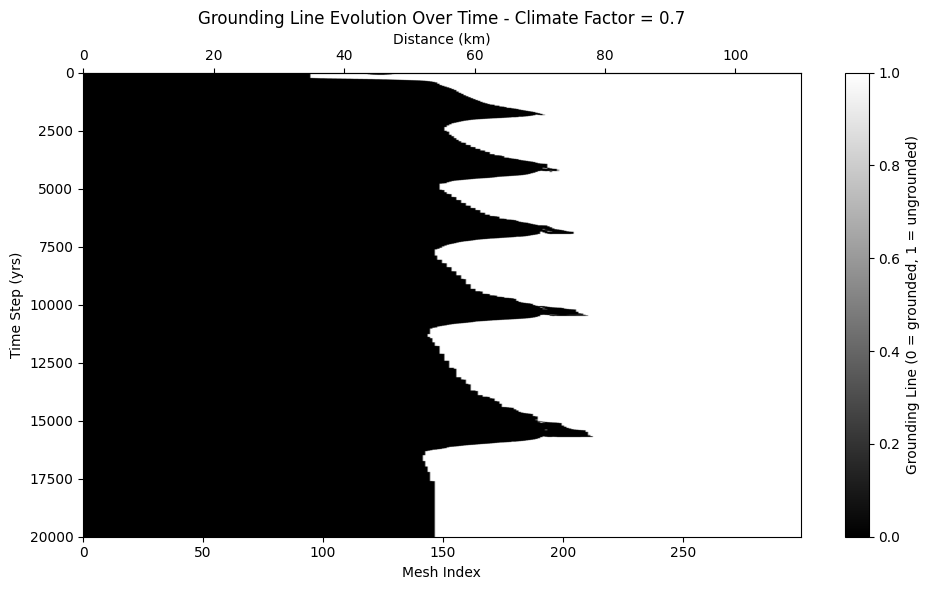

In [133]:
GL_dict = DATA_dict_cf_07['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf07)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [134]:
gl_positions_cf_07 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_07.append(idx)

gl_positions_cf_07 = np.array(gl_positions_cf_07)
GL_km_cf_07 = mesh_index_to_km(gl_positions_cf_07)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_07 = GL_km_cf_07[mask]

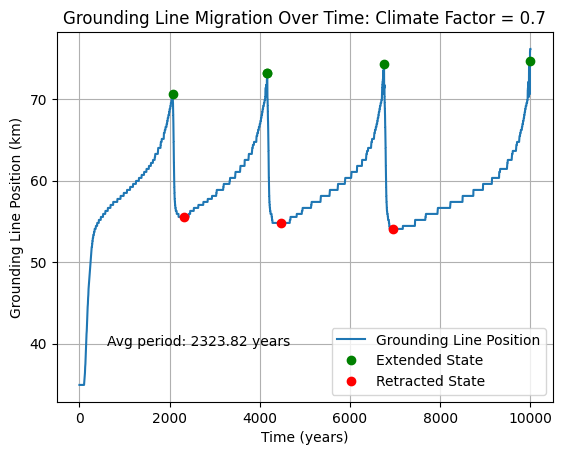

Mean cycle period: 2323.82 years
[2151.58083262 2496.05974501]
Mean advance amplitude: 73.21 km
[70.63545151 73.21070234 73.21070234 74.31438127 74.68227425]
Mean retreat amplitude: 54.82 km
[55.55183946 54.81605351 54.08026756]


In [135]:
cf_07_peaks, _ = find_peaks(GL_km_cf_07, prominence=4) 
cf_07_troughs, _ = find_peaks(-GL_km_cf_07, prominence=5)     
cf_07_periods = np.diff(np.array(time)[cf_07_troughs])
cf_07_adv_dists = GL_km_cf_07[cf_07_peaks]
cf_07_ret_dists = GL_km_cf_07[cf_07_troughs]


plt.plot(time, GL_km_cf_07, label='Grounding Line Position')
plt.plot(np.array(time)[cf_07_peaks], GL_km_cf_07[cf_07_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_07_troughs], GL_km_cf_07[cf_07_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_07_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.7")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_07_periods):.2f} years")
print(cf_07_periods)

print(f"Mean advance amplitude: {np.mean(cf_07_adv_dists):.2f} km")
print(cf_07_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_07_ret_dists):.2f} km")
print(cf_07_ret_dists)


## Grounding Line plotting - Climate Factor 0.8

In [136]:
gl_run_title_cf08 = str("Grounding Line Evolution Over Time - Climate Factor = 0.8")
cf_08 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_24__15_48_33_CF08.pkl.gz"
with gzip.open(cf_08, 'rb') as f:
    DATA_dict_cf_08 = pickle.load(f)

In [137]:
bed_dict = DATA_dict_cf_08['bed_dict']
base_dict = DATA_dict_cf_08['base_dict']
surf_dict= DATA_dict_cf_08 ['surf_dict']
sed_dict = DATA_dict_cf_08['sed_dict']
H_dict = DATA_dict_cf_08['H_dict']
us_dict = DATA_dict_cf_08['us_dict']
ub_dict = DATA_dict_cf_08['ub_dict']
Hs_dict = DATA_dict_cf_08['Hs_dict']
GL_dict = DATA_dict_cf_08['GL_dict']
Qs_dict = DATA_dict_cf_08['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.597293594048


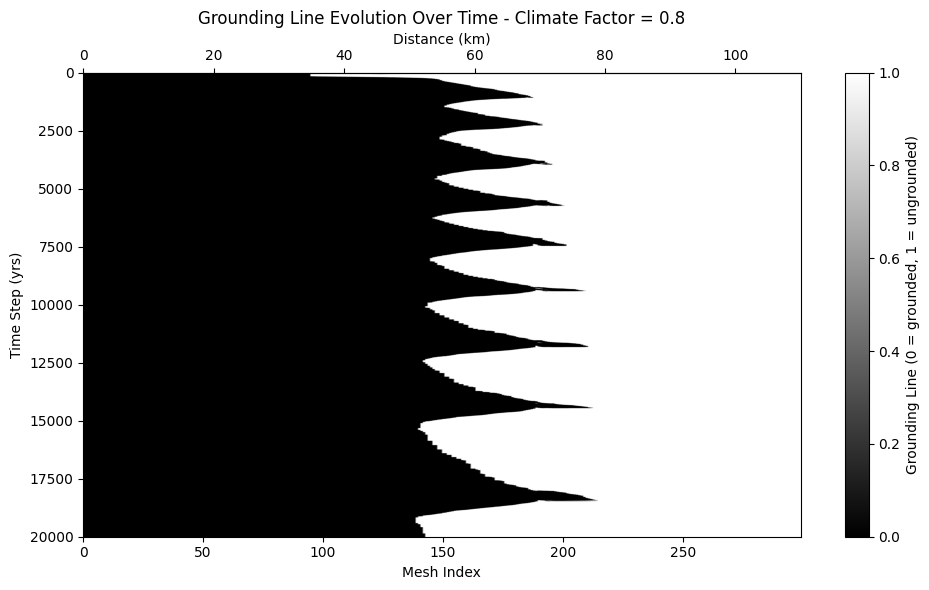

In [138]:
GL_dict = DATA_dict_cf_08['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf08)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [139]:
gl_positions_cf_08 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_08.append(idx)

gl_positions_cf_08 = np.array(gl_positions_cf_08)
GL_km_cf_08 = mesh_index_to_km(gl_positions_cf_08)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_08 = GL_km_cf_08[mask]

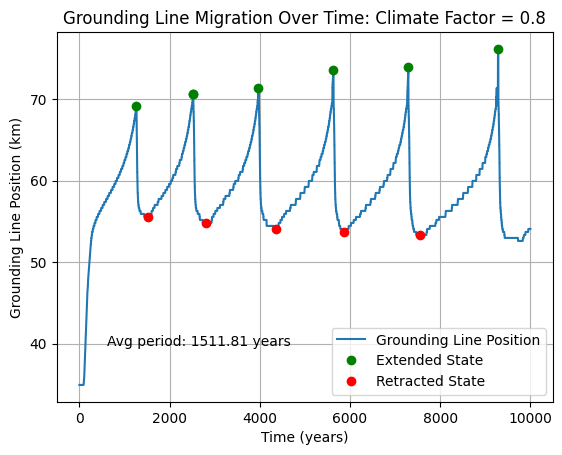

Mean cycle period: 1511.81 years
[1288.481671   1551.08256016 1521.852865   1685.81316991]
Mean advance amplitude: 72.21 km
[69.1638796  70.63545151 70.63545151 71.37123746 73.57859532 73.94648829
 76.15384615]
Mean retreat amplitude: 54.30 km
[55.55183946 54.81605351 54.08026756 53.71237458 53.34448161]


In [140]:
cf_08_peaks, _ = find_peaks(GL_km_cf_08, prominence=2) 
cf_08_troughs, _ = find_peaks(-GL_km_cf_08, prominence=2)     
cf_08_periods = np.diff(np.array(time)[cf_08_troughs])
cf_08_adv_dists = GL_km_cf_08[cf_08_peaks]
cf_08_ret_dists = GL_km_cf_08[cf_08_troughs]


plt.plot(time, GL_km_cf_08, label='Grounding Line Position')
plt.plot(np.array(time)[cf_08_peaks], GL_km_cf_08[cf_08_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_08_troughs], GL_km_cf_08[cf_08_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_08_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.8")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_08_periods):.2f} years")
print(cf_08_periods)

print(f"Mean advance amplitude: {np.mean(cf_08_adv_dists):.2f} km")
print(cf_08_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_08_ret_dists):.2f} km")
print(cf_08_ret_dists)


## Grounding Line plotting - Climate Factor 0.9

In [141]:
gl_run_title_cf09 = str("Grounding Line Evolution Over Time - Climate Factor = 0.9")
# cf_09 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ClimateFactorTests/Run9_cf0.9/DATA_Dictionary_2025_03_13__15_26_34.pkl.gz"
cf_09 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_24__21_33_53_CF09.pkl.gz"

with gzip.open(cf_09, 'rb') as f:
    DATA_dict_cf_09 = pickle.load(f)

In [142]:
bed_dict = DATA_dict_cf_09['bed_dict']
base_dict = DATA_dict_cf_09['base_dict']
surf_dict= DATA_dict_cf_09 ['surf_dict']
sed_dict = DATA_dict_cf_09['sed_dict']
H_dict = DATA_dict_cf_09['H_dict']
us_dict = DATA_dict_cf_09['us_dict']
ub_dict = DATA_dict_cf_09['ub_dict']
Hs_dict = DATA_dict_cf_09['Hs_dict']
GL_dict = DATA_dict_cf_09['GL_dict']
Qs_dict = DATA_dict_cf_09['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.658221255806


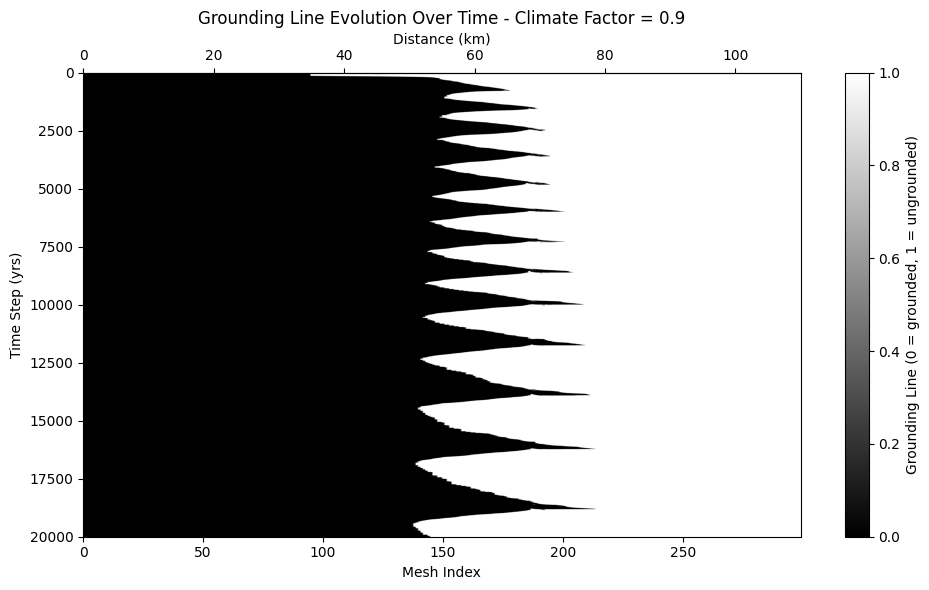

In [143]:
GL_dict = DATA_dict_cf_09['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf09)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [144]:
gl_positions_cf_09 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_09.append(idx)

gl_positions_cf_09 = np.array(gl_positions_cf_09)
GL_km_cf_09 = mesh_index_to_km(gl_positions_cf_09)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_09 = GL_km_cf_09[mask]


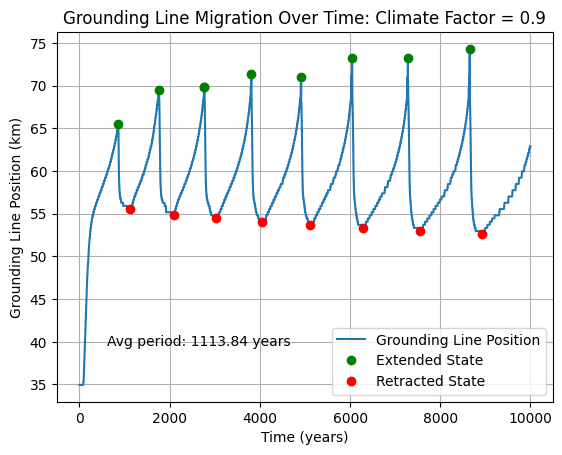

Mean cycle period: 1113.84 years
[ 969.70616289  939.61583265 1031.31026357 1063.37489446 1174.9520871
 1243.14178909 1374.77914484]
Mean advance amplitude: 70.88 km
[65.48494983 69.53177258 69.89966555 69.89966555 71.37123746 71.00334448
 73.21070234 73.21070234 74.31438127]
Mean retreat amplitude: 53.94 km
[55.55183946 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 52.97658863 52.60869565]


In [145]:
cf_09_peaks, _ = find_peaks(GL_km_cf_09, prominence=3) 
cf_09_troughs, _ = find_peaks(-GL_km_cf_09, prominence=3)     
cf_09_periods = np.diff(np.array(time)[cf_09_troughs])
cf_09_adv_dists = GL_km_cf_09[cf_09_peaks]
cf_09_ret_dists = GL_km_cf_09[cf_09_troughs]


plt.plot(time, GL_km_cf_09, label='Grounding Line Position')
plt.plot(np.array(time)[cf_09_peaks], GL_km_cf_09[cf_09_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_09_troughs], GL_km_cf_09[cf_09_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_09_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 0.9")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_09_periods):.2f} years")
print(cf_09_periods)

print(f"Mean advance amplitude: {np.mean(cf_09_adv_dists):.2f} km")
print(cf_09_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_09_ret_dists):.2f} km")
print(cf_09_ret_dists)


## Grounding Line plotting - Climate Factor 1.0

In [146]:
gl_run_title_cf10 = str("Grounding Line Evolution Over Time - Climate Factor = 1.0")
cf_10 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/BaseTest/DATA_Dictionary_2025_04_21__21_38_21.pkl.gz"
with gzip.open(cf_10, 'rb') as f:
    DATA_dict_cf_10 = pickle.load(f)

In [147]:
bed_dict = DATA_dict_cf_10['bed_dict']
base_dict = DATA_dict_cf_10['base_dict']
surf_dict= DATA_dict_cf_10 ['surf_dict']
sed_dict = DATA_dict_cf_10['sed_dict']
H_dict = DATA_dict_cf_10['H_dict']
us_dict = DATA_dict_cf_10['us_dict']
ub_dict = DATA_dict_cf_10['ub_dict']
Hs_dict = DATA_dict_cf_10['Hs_dict']
GL_dict = DATA_dict_cf_10['GL_dict']
Qs_dict = DATA_dict_cf_10['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.06638489569


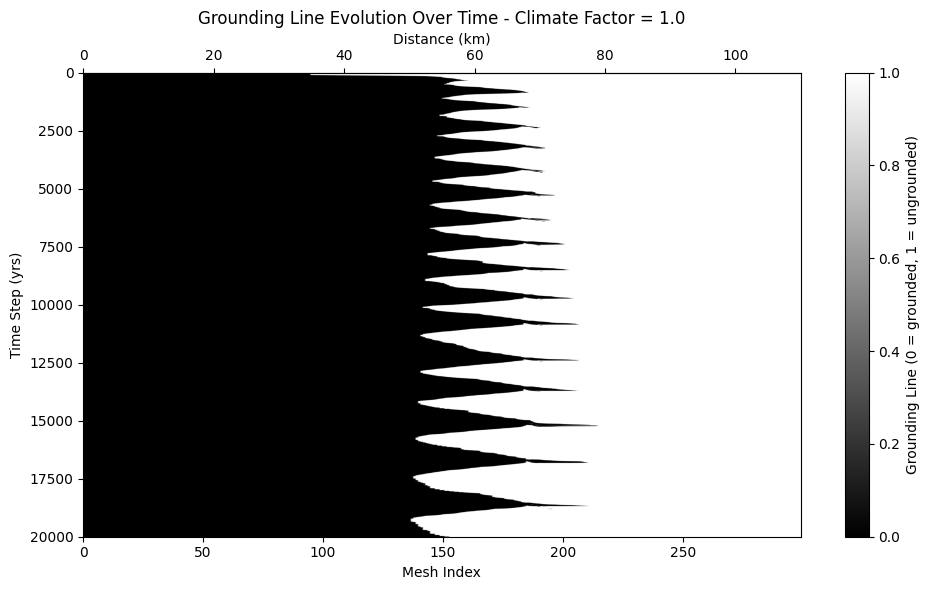

In [148]:
GL_dict = DATA_dict_cf_10['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf10)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [149]:
gl_positions_cf_10 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_10.append(idx)

gl_positions_cf_10 = np.array(gl_positions_cf_10)
GL_km_cf_10 = mesh_index_to_km(gl_positions_cf_10)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_10 = GL_km_cf_10[mask]


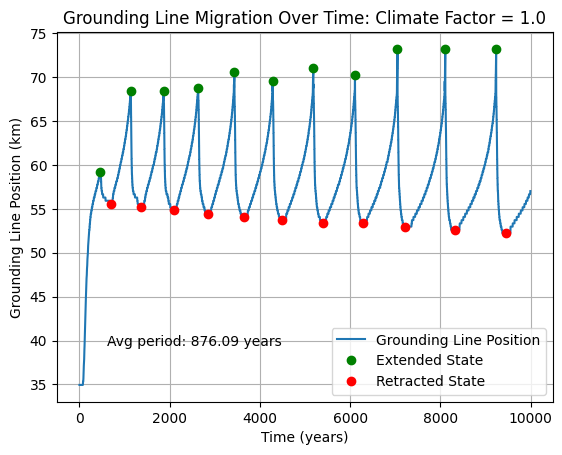

Mean cycle period: 876.09 years
[ 674.60801648  721.10593334  755.54657117  808.58369559  835.96918
  911.25251579  878.57957437  932.10549817 1105.41872961 1137.69453322]
Mean advance amplitude: 69.63 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234 73.21070234]
Mean retreat amplitude: 53.85 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.24080268]


In [150]:
cf_10_peaks, _ = find_peaks(GL_km_cf_10, prominence=3) 
cf_10_troughs, _ = find_peaks(-GL_km_cf_10, prominence=3)     
cf_10_periods = np.diff(np.array(time)[cf_10_troughs])
cf_10_adv_dists = GL_km_cf_10[cf_10_peaks]
cf_10_ret_dists = GL_km_cf_10[cf_10_troughs]


plt.plot(time, GL_km_cf_10, label='Grounding Line Position')
plt.plot(np.array(time)[cf_10_peaks], GL_km_cf_10[cf_10_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_10_troughs], GL_km_cf_10[cf_10_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_10_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.0")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_10_periods):.2f} years")
print(cf_10_periods)

print(f"Mean advance amplitude: {np.mean(cf_10_adv_dists):.2f} km")
print(cf_10_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_10_ret_dists):.2f} km")
print(cf_10_ret_dists)


## Grounding Line plotting - Climate Factor 1.1

In [151]:
gl_run_title_cf11 = str("Grounding Line Evolution Over Time - Climate Factor = 1.1")
cf_11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_24__22_39_21_CF11.pkl.gz"
with gzip.open(cf_11, 'rb') as f:
    DATA_dict_cf_11 = pickle.load(f)

In [152]:
bed_dict = DATA_dict_cf_11['bed_dict']
base_dict = DATA_dict_cf_11['base_dict']
surf_dict= DATA_dict_cf_11 ['surf_dict']
sed_dict = DATA_dict_cf_11['sed_dict']
H_dict = DATA_dict_cf_11['H_dict']
us_dict = DATA_dict_cf_11['us_dict']
ub_dict = DATA_dict_cf_11['ub_dict']
Hs_dict = DATA_dict_cf_11['Hs_dict']
GL_dict = DATA_dict_cf_11['GL_dict']
Qs_dict = DATA_dict_cf_11['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.908435335834


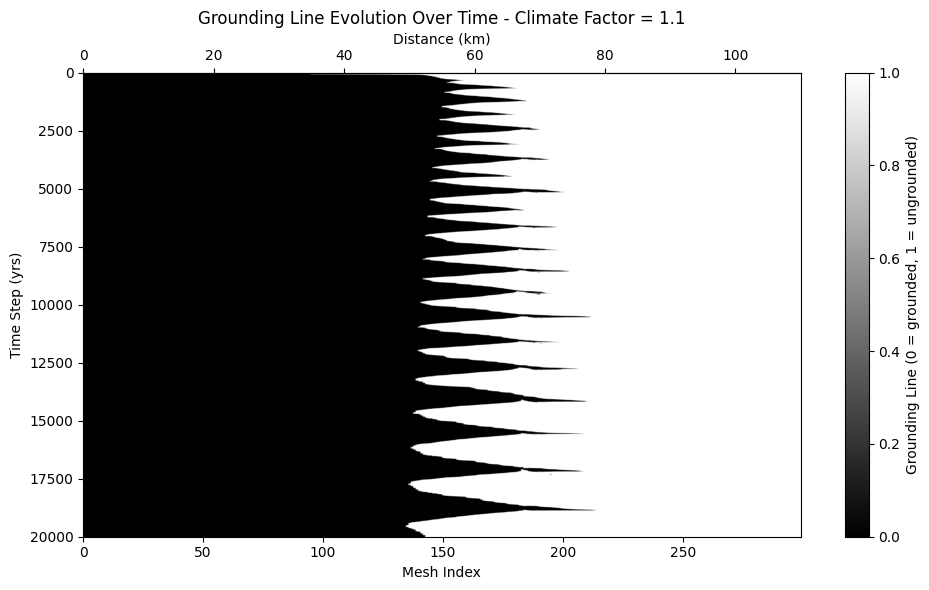

In [153]:
GL_dict = DATA_dict_cf_11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [154]:
gl_positions_cf_11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_11.append(idx)

gl_positions_cf_11 = np.array(gl_positions_cf_11)
GL_km_cf_11 = mesh_index_to_km(gl_positions_cf_11)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_11 = GL_km_cf_11[mask]


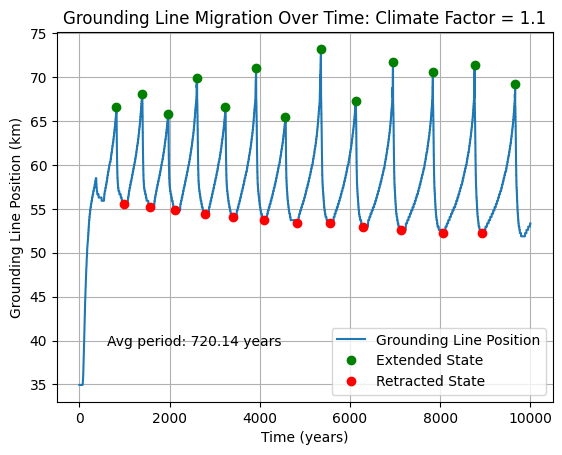

Mean cycle period: 720.14 years
[560.74777603 570.87356475 645.60231241 635.11046657 693.45411937
 713.90990138 740.65554362 722.88515478 857.22493731 927.55777257
 853.51728339]
Mean advance amplitude: 68.99 km
[66.58862876 68.06020067 65.85284281 69.89966555 66.58862876 71.00334448
 65.48494983 73.21070234 67.32441472 71.73913043 70.63545151 71.37123746
 69.1638796 ]
Mean retreat amplitude: 53.71 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.24080268 52.24080268]


In [155]:
cf_11_peaks, _ = find_peaks(GL_km_cf_11, prominence=3) 
cf_11_troughs, _ = find_peaks(-GL_km_cf_11, prominence=3)     
cf_11_periods = np.diff(np.array(time)[cf_11_troughs])
cf_11_adv_dists = GL_km_cf_11[cf_11_peaks]
cf_11_ret_dists = GL_km_cf_11[cf_11_troughs]


plt.plot(time, GL_km_cf_11, label='Grounding Line Position')
plt.plot(np.array(time)[cf_11_peaks], GL_km_cf_11[cf_11_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_11_troughs], GL_km_cf_11[cf_11_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_11_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.1")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_11_periods):.2f} years")
print(cf_11_periods)

print(f"Mean advance amplitude: {np.mean(cf_11_adv_dists):.2f} km")
print(cf_11_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_11_ret_dists):.2f} km")
print(cf_11_ret_dists)


## Grounding Line plotting - Climate Factor 1.2

In [156]:
gl_run_title_cf12 = str("Grounding Line Evolution Over Time - Climate Factor = 1.2")
cf_12 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_25__00_26_21_CF12.pkl.gz"
with gzip.open(cf_12, 'rb') as f:
    DATA_dict_cf_12 = pickle.load(f)

In [157]:
bed_dict = DATA_dict_cf_12['bed_dict']
base_dict = DATA_dict_cf_12['base_dict']
surf_dict= DATA_dict_cf_12 ['surf_dict']
sed_dict = DATA_dict_cf_12['sed_dict']
H_dict = DATA_dict_cf_12['H_dict']
us_dict = DATA_dict_cf_12['us_dict']
ub_dict = DATA_dict_cf_12['ub_dict']
Hs_dict = DATA_dict_cf_12['Hs_dict']
GL_dict = DATA_dict_cf_12['GL_dict']
Qs_dict = DATA_dict_cf_12['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20003.559006624077


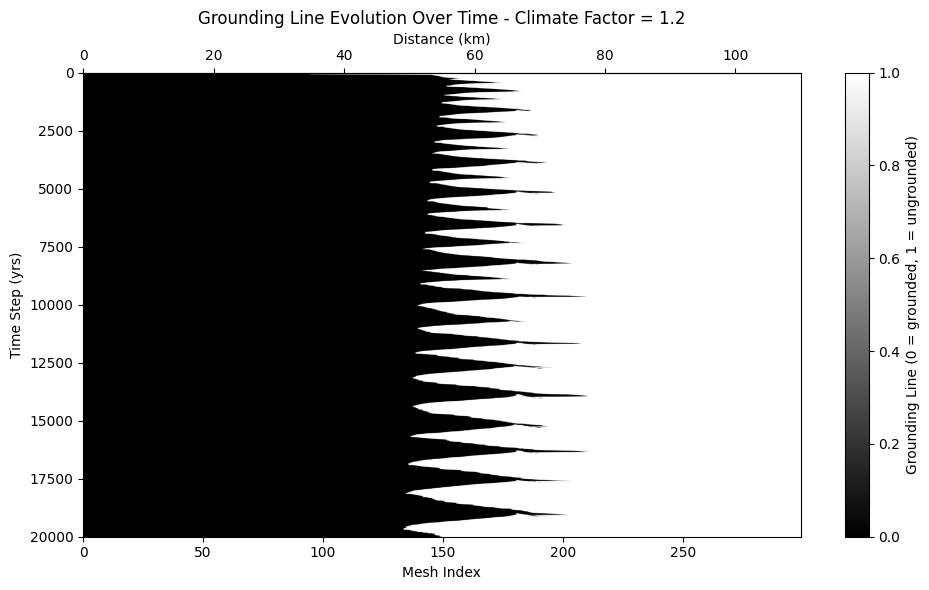

In [158]:
GL_dict = DATA_dict_cf_12['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf12)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [159]:
gl_positions_cf_12 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_12.append(idx)

gl_positions_cf_12 = np.array(gl_positions_cf_12)
GL_km_cf_12 = mesh_index_to_km(gl_positions_cf_12)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_12 = GL_km_cf_12[mask]


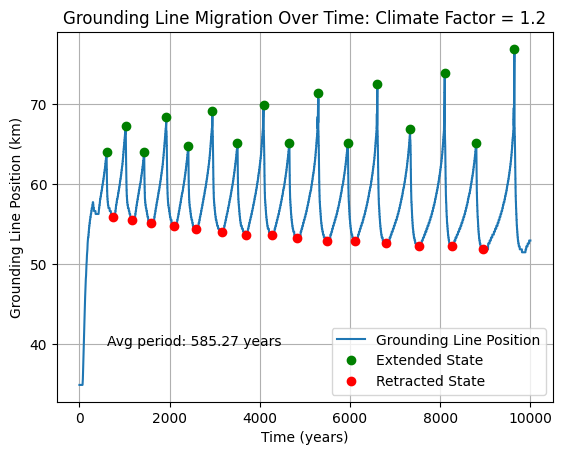

Mean cycle period: 585.27 years
[415.15129764 424.16459017 511.3537252  482.40393965 579.58587865
 540.85077275 571.31930456 563.81600956 663.7797042  612.21104052
 690.54497162 723.21465659 745.43679533 669.88921848]
Mean advance amplitude: 68.11 km
[64.01337793 67.32441472 64.01337793 68.42809365 64.74916388 69.1638796
 65.11705686 69.89966555 65.11705686 71.37123746 65.11705686 72.47491639
 66.95652174 73.94648829 65.11705686 76.88963211]
Mean retreat amplitude: 53.71 km
[55.91973244 55.55183946 55.18394649 54.81605351 54.44816054 54.08026756
 53.71237458 53.71237458 53.34448161 52.97658863 52.97658863 52.60869565
 52.24080268 52.24080268 51.8729097 ]


In [160]:
cf_12_peaks, _ = find_peaks(GL_km_cf_12, prominence=3) 
cf_12_troughs, _ = find_peaks(-GL_km_cf_12, prominence=3)     
cf_12_periods = np.diff(np.array(time)[cf_12_troughs])
cf_12_adv_dists = GL_km_cf_12[cf_12_peaks]
cf_12_ret_dists = GL_km_cf_12[cf_12_troughs]


plt.plot(time, GL_km_cf_12, label='Grounding Line Position')
plt.plot(np.array(time)[cf_12_peaks], GL_km_cf_12[cf_12_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_12_troughs], GL_km_cf_12[cf_12_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_12_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.2")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_12_periods):.2f} years")
print(cf_12_periods)

print(f"Mean advance amplitude: {np.mean(cf_12_adv_dists):.2f} km")
print(cf_12_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_12_ret_dists):.2f} km")
print(cf_12_ret_dists)


## Grounding Line plotting - Climate Factor 1.3

In [161]:
gl_run_title_cf13 = str("Grounding Line Evolution Over Time - Climate Factor = 1.3")
cf_13 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_25__13_04_27_CF13_10k.pkl.gz"
with gzip.open(cf_13, 'rb') as f:
    DATA_dict_cf_13 = pickle.load(f)

In [162]:
bed_dict = DATA_dict_cf_13['bed_dict']
base_dict = DATA_dict_cf_13['base_dict']
surf_dict= DATA_dict_cf_13 ['surf_dict']
sed_dict = DATA_dict_cf_13['sed_dict']
H_dict = DATA_dict_cf_13['H_dict']
us_dict = DATA_dict_cf_13['us_dict']
ub_dict = DATA_dict_cf_13['ub_dict']
Hs_dict = DATA_dict_cf_13['Hs_dict']
GL_dict = DATA_dict_cf_13['GL_dict']
Qs_dict = DATA_dict_cf_13['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

10000.184975979482


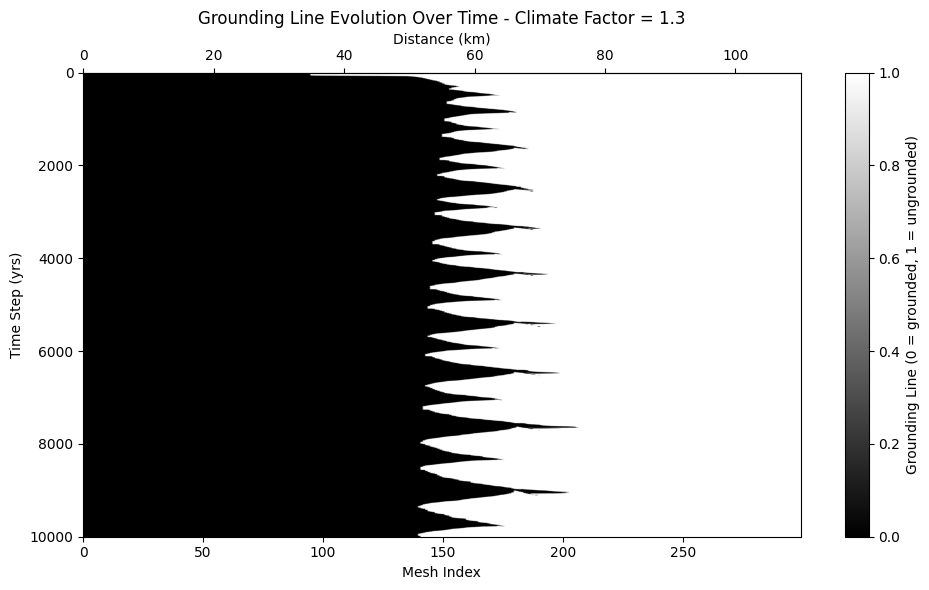

In [163]:
GL_dict = DATA_dict_cf_13['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf13)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [164]:
gl_positions_cf_13 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_13.append(idx)

gl_positions_cf_13 = np.array(gl_positions_cf_13)
GL_km_cf_13 = mesh_index_to_km(gl_positions_cf_13)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_13 = GL_km_cf_13[mask]


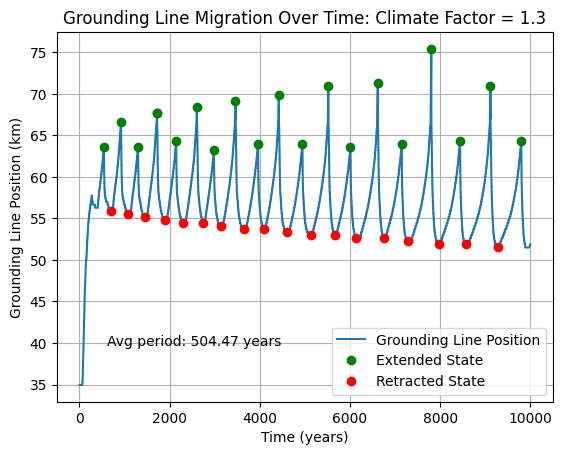

Mean cycle period: 504.47 years
[387.46146032 368.07170716 447.07917858 397.3459491  451.03256766
 387.50638443 522.19964275 430.35038223 506.01450626 546.25148676
 522.4988369  475.0490099  617.29864463 538.87420225 678.13143638
 611.35794812 689.42476932]
Mean advance amplitude: 66.88 km
[63.64548495 66.58862876 63.64548495 67.69230769 67.69230769 64.3812709
 68.42809365 63.27759197 69.1638796  64.01337793 69.89966555 64.01337793
 71.00334448 63.64548495 71.37123746 64.01337793 75.4180602  64.3812709
 71.00334448 64.3812709 ]
Mean retreat amplitude: 53.55 km
[55.91973244 55.55183946 55.18394649 54.81605351 54.44816054 54.44816054
 54.08026756 53.71237458 53.71237458 53.34448161 52.97658863 52.97658863
 52.60869565 52.60869565 52.24080268 51.8729097  51.8729097  51.50501672]


In [165]:
cf_13_peaks, _ = find_peaks(GL_km_cf_13, prominence=3) 
cf_13_troughs, _ = find_peaks(-GL_km_cf_13, prominence=3)     
cf_13_periods = np.diff(np.array(time)[cf_13_troughs])
cf_13_adv_dists = GL_km_cf_13[cf_13_peaks]
cf_13_ret_dists = GL_km_cf_13[cf_13_troughs]


plt.plot(time, GL_km_cf_13, label='Grounding Line Position')
plt.plot(np.array(time)[cf_13_peaks], GL_km_cf_13[cf_13_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_13_troughs], GL_km_cf_13[cf_13_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_13_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.3")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_13_periods):.2f} years")
print(cf_13_periods)

print(f"Mean advance amplitude: {np.mean(cf_13_adv_dists):.2f} km")
print(cf_13_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_13_ret_dists):.2f} km")
print(cf_13_ret_dists)


## Grounding Line plotting - Climate Factor 1.4

In [166]:
gl_run_title_cf14 = str("Grounding Line Evolution Over Time - Climate Factor = 1.4")
cf_14 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_25__14_29_56_CF14.pkl.gz"
with gzip.open(cf_14, 'rb') as f:
    DATA_dict_cf_14 = pickle.load(f)

In [167]:
bed_dict = DATA_dict_cf_14['bed_dict']
base_dict = DATA_dict_cf_14['base_dict']
surf_dict= DATA_dict_cf_14 ['surf_dict']
sed_dict = DATA_dict_cf_14['sed_dict']
H_dict = DATA_dict_cf_14['H_dict']
us_dict = DATA_dict_cf_14['us_dict']
ub_dict = DATA_dict_cf_14['ub_dict']
Hs_dict = DATA_dict_cf_14['Hs_dict']
GL_dict = DATA_dict_cf_14['GL_dict']
Qs_dict = DATA_dict_cf_14['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20002.483081009635


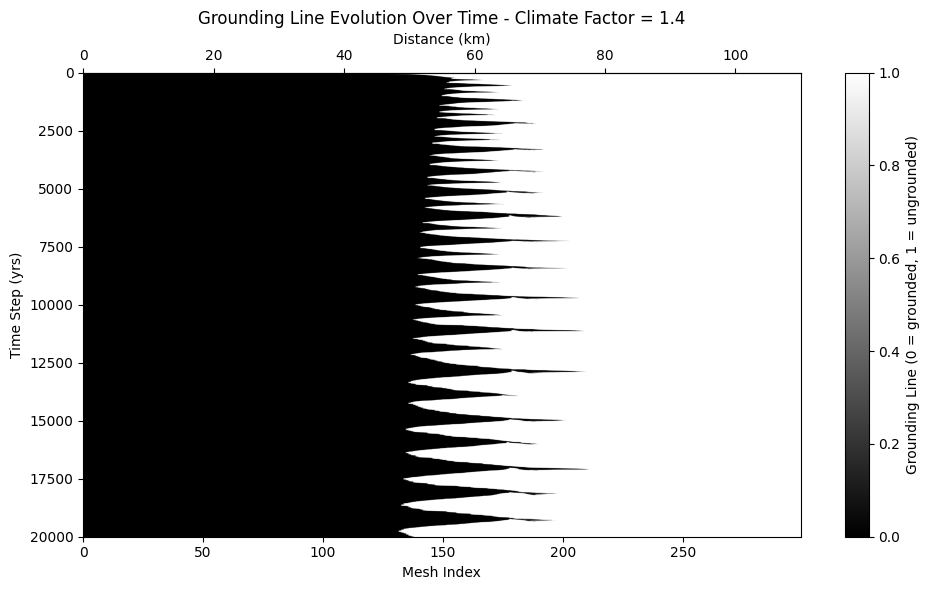

In [168]:
GL_dict = DATA_dict_cf_14['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf14)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [169]:
gl_positions_cf_14 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_14.append(idx)

gl_positions_cf_14 = np.array(gl_positions_cf_14)
GL_km_cf_14 = mesh_index_to_km(gl_positions_cf_14)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_14 = GL_km_cf_14[mask]


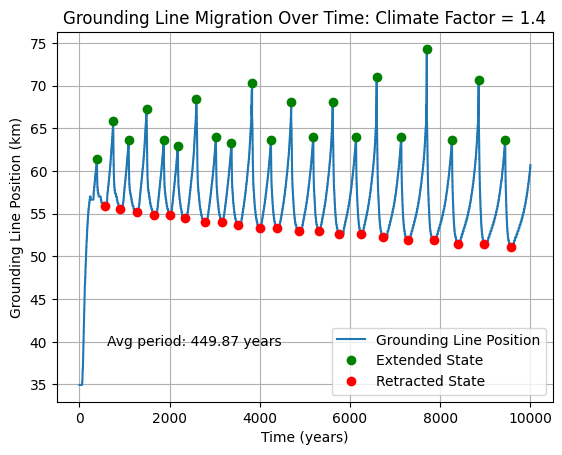

Mean cycle period: 449.87 years
[340.36984783 360.65721746 395.53925086 350.01825754 322.34555951
 451.05498855 368.31940436 370.17646404 471.3817219  390.52124415
 488.60936323 430.04813955 439.84431593 502.55650751 474.96302485
 569.14603257 563.8786831  542.54566413 574.98767768 590.52800211]
Mean advance amplitude: 65.99 km
[61.43812709 65.85284281 63.64548495 67.32441472 63.64548495 62.909699
 68.42809365 64.01337793 63.27759197 70.26755853 63.64548495 68.06020067
 64.01337793 68.06020067 64.01337793 71.00334448 64.01337793 74.31438127
 63.64548495 70.63545151 63.64548495]
Mean retreat amplitude: 53.36 km
[55.91973244 55.55183946 55.18394649 54.81605351 54.81605351 54.44816054
 54.08026756 54.08026756 53.71237458 53.34448161 53.34448161 52.97658863
 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097  51.8729097
 51.50501672 51.50501672 51.13712375]


In [170]:
cf_14_peaks, _ = find_peaks(GL_km_cf_14, prominence=3) 
cf_14_troughs, _ = find_peaks(-GL_km_cf_14, prominence=3)     
cf_14_periods = np.diff(np.array(time)[cf_14_troughs])
cf_14_adv_dists = GL_km_cf_14[cf_14_peaks]
cf_14_ret_dists = GL_km_cf_14[cf_14_troughs]


plt.plot(time, GL_km_cf_14, label='Grounding Line Position')
plt.plot(np.array(time)[cf_14_peaks], GL_km_cf_14[cf_14_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_14_troughs], GL_km_cf_14[cf_14_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_14_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.4")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_14_periods):.2f} years")
print(cf_14_periods)

print(f"Mean advance amplitude: {np.mean(cf_14_adv_dists):.2f} km")
print(cf_14_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_14_ret_dists):.2f} km")
print(cf_14_ret_dists)


## Grounding Line plotting - Climate Factor 1.5

In [171]:
gl_run_title_cf15 = str("Grounding Line Evolution Over Time - Climate Factor = 1.5")
cf_15 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_25__16_26_31_CF15.pkl.gz"
with gzip.open(cf_15, 'rb') as f:
    DATA_dict_cf_15 = pickle.load(f)

In [172]:
bed_dict = DATA_dict_cf_15['bed_dict']
base_dict = DATA_dict_cf_15['base_dict']
surf_dict= DATA_dict_cf_15 ['surf_dict']
sed_dict = DATA_dict_cf_15['sed_dict']
H_dict = DATA_dict_cf_15['H_dict']
us_dict = DATA_dict_cf_15['us_dict']
ub_dict = DATA_dict_cf_15['ub_dict']
Hs_dict = DATA_dict_cf_15['Hs_dict']
GL_dict = DATA_dict_cf_15['GL_dict']
Qs_dict = DATA_dict_cf_15['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

10000.070781498687


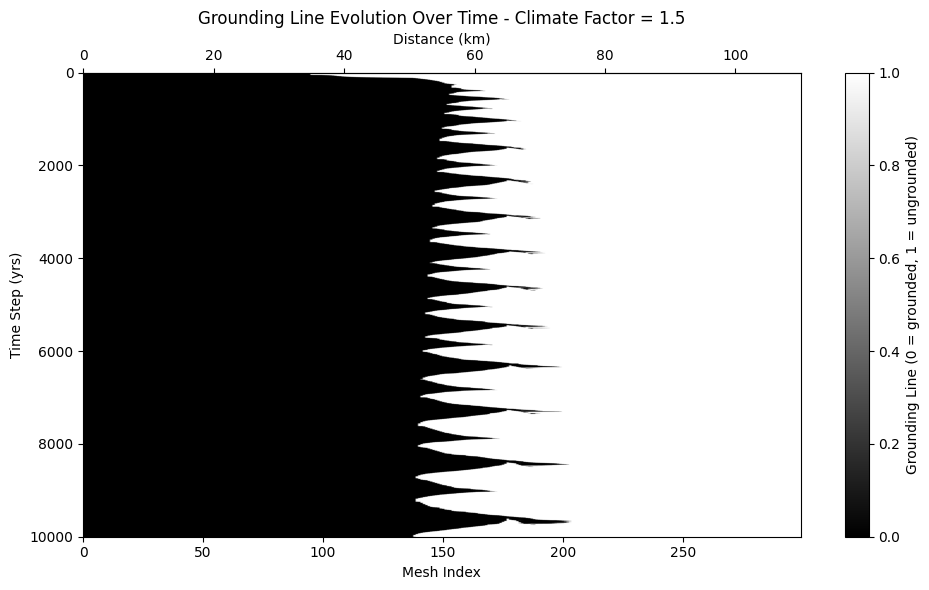

In [173]:
GL_dict = DATA_dict_cf_15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [174]:
gl_positions_cf_15 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_15.append(idx)

gl_positions_cf_15 = np.array(gl_positions_cf_15)
GL_km_cf_15 = mesh_index_to_km(gl_positions_cf_15)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_15 = GL_km_cf_15[mask]


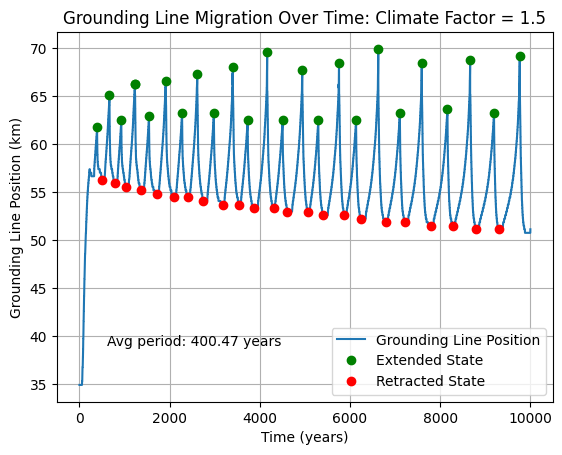

Mean cycle period: 400.47 years
[274.68783965 254.66485674 336.04806162 342.26524715 377.46889348
 311.08952523 349.64888395 428.84269436 362.36550408 338.90015888
 423.23064971 308.66948761 453.8908914  337.85828616 471.68847503
 365.81500469 562.48333667 414.11151769 579.04200297 488.33178268
 507.60523872 521.57312313]
Mean advance amplitude: 65.43 km
[61.80602007 65.11705686 62.54180602 66.22073579 66.22073579 62.909699
 66.58862876 63.27759197 67.32441472 63.27759197 68.06020067 62.54180602
 69.53177258 62.54180602 67.69230769 62.54180602 68.42809365 62.54180602
 69.89966555 63.27759197 68.42809365 63.64548495 68.79598662 63.27759197
 69.1638796 ]
Mean retreat amplitude: 53.36 km
[56.28762542 55.91973244 55.55183946 55.18394649 54.81605351 54.44816054
 54.44816054 54.08026756 53.71237458 53.71237458 53.34448161 53.34448161
 52.97658863 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097
 51.8729097  51.50501672 51.50501672 51.13712375 51.13712375]


In [175]:
cf_15_peaks, _ = find_peaks(GL_km_cf_15, prominence=3) 
cf_15_troughs, _ = find_peaks(-GL_km_cf_15, prominence=3)     
cf_15_periods = np.diff(np.array(time)[cf_15_troughs])
cf_15_adv_dists = GL_km_cf_15[cf_15_peaks]
cf_15_ret_dists = GL_km_cf_15[cf_15_troughs]


plt.plot(time, GL_km_cf_15, label='Grounding Line Position')
plt.plot(np.array(time)[cf_15_peaks], GL_km_cf_15[cf_15_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_15_troughs], GL_km_cf_15[cf_15_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_15_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.5")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_15_periods):.2f} years")
print(cf_15_periods)

print(f"Mean advance amplitude: {np.mean(cf_15_adv_dists):.2f} km")
print(cf_15_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_15_ret_dists):.2f} km")
print(cf_15_ret_dists)


Grounding Line plotting - Climate Factor 1.6

In [176]:
gl_run_title_cf16 = str("Grounding Line Evolution Over Time - Climate Factor = 1.6")
cf_16 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_25__22_54_39_CF16.pkl.gz"
with gzip.open(cf_16, 'rb') as f:
    DATA_dict_cf_16 = pickle.load(f)

In [177]:
bed_dict = DATA_dict_cf_16['bed_dict']
base_dict = DATA_dict_cf_16['base_dict']
surf_dict= DATA_dict_cf_16 ['surf_dict']
sed_dict = DATA_dict_cf_16['sed_dict']
H_dict = DATA_dict_cf_16['H_dict']
us_dict = DATA_dict_cf_16['us_dict']
ub_dict = DATA_dict_cf_16['ub_dict']
Hs_dict = DATA_dict_cf_16['Hs_dict']
GL_dict = DATA_dict_cf_16['GL_dict']
Qs_dict = DATA_dict_cf_16['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

20000.6291848665


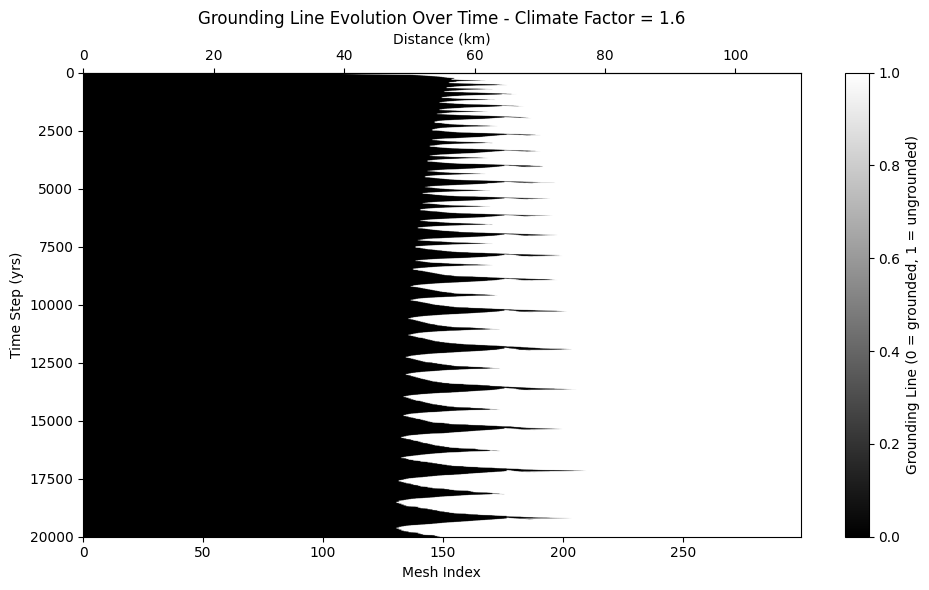

In [178]:
GL_dict = DATA_dict_cf_16['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf16)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [179]:
gl_positions_cf_16 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_16.append(idx)

gl_positions_cf_16 = np.array(gl_positions_cf_16)
GL_km_cf_16 = mesh_index_to_km(gl_positions_cf_16)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_16 = GL_km_cf_16[mask]


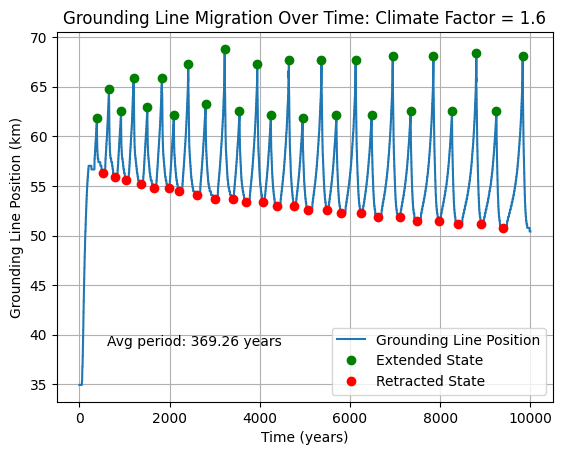

Mean cycle period: 369.26 years
[270.01065286 231.44310498 335.91227211 284.35187829 330.53118525
 225.34942774 403.36011114 403.92630618 388.96774462 294.39030857
 378.80649003 300.53917466 393.56156658 301.2209374  422.2983632
 312.50858124 441.01753021 382.34386831 479.15713693 393.63720578
 467.44320617 426.1978535  522.80741941 472.4143443 ]
Mean advance amplitude: 64.88 km
[61.80602007 64.74916388 62.54180602 65.85284281 62.909699   65.85284281
 62.17391304 67.32441472 63.27759197 68.79598662 62.54180602 67.32441472
 62.17391304 67.69230769 61.80602007 67.69230769 62.17391304 67.69230769
 62.17391304 68.06020067 62.54180602 68.06020067 62.54180602 68.42809365
 62.54180602 68.06020067]
Mean retreat amplitude: 53.23 km
[56.28762542 55.91973244 55.55183946 55.18394649 54.81605351 54.81605351
 54.44816054 54.08026756 53.71237458 53.71237458 53.34448161 53.34448161
 52.97658863 52.97658863 52.60869565 52.60869565 52.24080268 52.24080268
 51.8729097  51.8729097  51.50501672 51.50501672

In [180]:
cf_16_peaks, _ = find_peaks(GL_km_cf_16, prominence=3) 
cf_16_troughs, _ = find_peaks(-GL_km_cf_16, prominence=3)     
cf_16_periods = np.diff(np.array(time)[cf_16_troughs])
cf_16_adv_dists = GL_km_cf_16[cf_16_peaks]
cf_16_ret_dists = GL_km_cf_16[cf_16_troughs]


plt.plot(time, GL_km_cf_16, label='Grounding Line Position')
plt.plot(np.array(time)[cf_16_peaks], GL_km_cf_16[cf_16_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_16_troughs], GL_km_cf_16[cf_16_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_16_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.6")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_16_periods):.2f} years")
print(cf_16_periods)

print(f"Mean advance amplitude: {np.mean(cf_16_adv_dists):.2f} km")
print(cf_16_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_16_ret_dists):.2f} km")
print(cf_16_ret_dists)


Grounding Line plotting - Climate Factor 1.7

In [181]:
gl_run_title_cf17 = str("Grounding Line Evolution Over Time - Climate Factor = 1.7")
cf_17 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_26__13_33_27_CF17.pkl.gz"
with gzip.open(cf_17, 'rb') as f:
    DATA_dict_cf_17 = pickle.load(f)

In [182]:
bed_dict = DATA_dict_cf_17['bed_dict']
base_dict = DATA_dict_cf_17['base_dict']
surf_dict= DATA_dict_cf_17 ['surf_dict']
sed_dict = DATA_dict_cf_17['sed_dict']
H_dict = DATA_dict_cf_17['H_dict']
us_dict = DATA_dict_cf_17['us_dict']
ub_dict = DATA_dict_cf_17['ub_dict']
Hs_dict = DATA_dict_cf_17['Hs_dict']
GL_dict = DATA_dict_cf_17['GL_dict']
Qs_dict = DATA_dict_cf_17['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

10000.153948668918


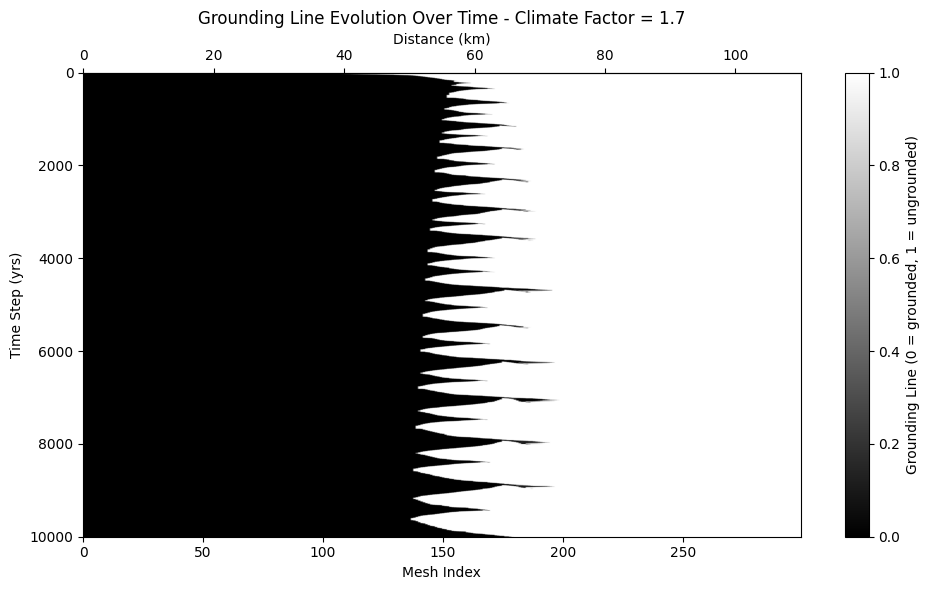

In [183]:
GL_dict = DATA_dict_cf_17['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf17)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [184]:
gl_positions_cf_17 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_17.append(idx)

gl_positions_cf_17 = np.array(gl_positions_cf_17)
GL_km_cf_17 = mesh_index_to_km(gl_positions_cf_17)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_17 = GL_km_cf_17[mask]


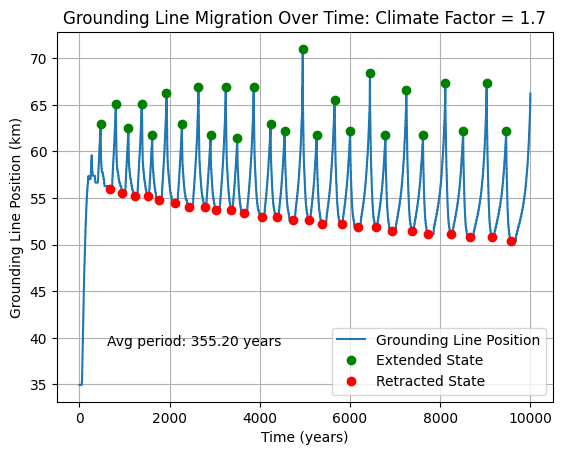

Mean cycle period: 355.20 years
[270.91102142 275.83306798 283.47513124 244.06378619 369.7067559
 316.27320404 341.47020484 245.10348065 339.4005209  283.30934407
 408.35806052 331.21185322 336.69265261 359.27463102 304.60513957
 423.23144875 366.0853383  387.62873698 368.02783926 440.53092773
 362.83632159 499.81248785 412.76336954 492.65286859 416.80736876]
Mean advance amplitude: 64.38 km
[62.909699   65.11705686 62.54180602 65.11705686 61.80602007 66.22073579
 62.909699   66.95652174 61.80602007 66.95652174 61.43812709 66.95652174
 62.909699   62.17391304 71.00334448 61.80602007 65.48494983 62.17391304
 68.42809365 61.80602007 66.58862876 61.80602007 67.32441472 62.17391304
 67.32441472 62.17391304]
Mean retreat amplitude: 52.95 km
[55.91973244 55.55183946 55.18394649 55.18394649 54.81605351 54.44816054
 54.08026756 54.08026756 53.71237458 53.71237458 53.34448161 52.97658863
 52.97658863 52.60869565 52.60869565 52.24080268 52.24080268 51.8729097
 51.8729097  51.50501672 51.50501672

In [185]:
cf_17_peaks, _ = find_peaks(GL_km_cf_17, prominence=3) 
cf_17_troughs, _ = find_peaks(-GL_km_cf_17, prominence=3)     
cf_17_periods = np.diff(np.array(time)[cf_17_troughs])
cf_17_adv_dists = GL_km_cf_17[cf_17_peaks]
cf_17_ret_dists = GL_km_cf_17[cf_17_troughs]


plt.plot(time, GL_km_cf_17, label='Grounding Line Position')
plt.plot(np.array(time)[cf_17_peaks], GL_km_cf_17[cf_17_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_17_troughs], GL_km_cf_17[cf_17_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_17_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.7")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_17_periods):.2f} years")
print(cf_17_periods)

print(f"Mean advance amplitude: {np.mean(cf_17_adv_dists):.2f} km")
print(cf_17_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_17_ret_dists):.2f} km")
print(cf_17_ret_dists)


Grounding Line plotting - Climate Factor 1.8

In [186]:
gl_run_title_cf18 = str("Grounding Line Evolution Over Time - Climate Factor = 1.8")
cf_18 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_26__15_42_40_CF18.pkl.gz"
with gzip.open(cf_18, 'rb') as f:
    DATA_dict_cf_18 = pickle.load(f)

In [187]:
bed_dict = DATA_dict_cf_18['bed_dict']
base_dict = DATA_dict_cf_18['base_dict']
surf_dict= DATA_dict_cf_18 ['surf_dict']
sed_dict = DATA_dict_cf_18['sed_dict']
H_dict = DATA_dict_cf_18['H_dict']
us_dict = DATA_dict_cf_18['us_dict']
ub_dict = DATA_dict_cf_18['ub_dict']
Hs_dict = DATA_dict_cf_18['Hs_dict']
GL_dict = DATA_dict_cf_18['GL_dict']
Qs_dict = DATA_dict_cf_18['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

10000.623949022101


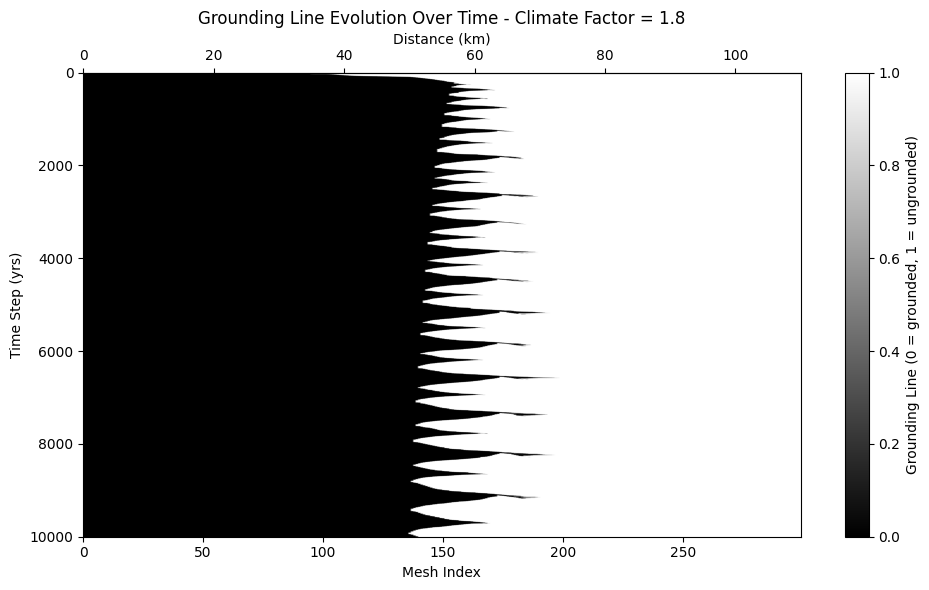

In [188]:
GL_dict = DATA_dict_cf_18['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf18)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [189]:
gl_positions_cf_18 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_18.append(idx)

gl_positions_cf_18 = np.array(gl_positions_cf_18)
GL_km_cf_18 = mesh_index_to_km(gl_positions_cf_18)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_18 = GL_km_cf_18[mask]


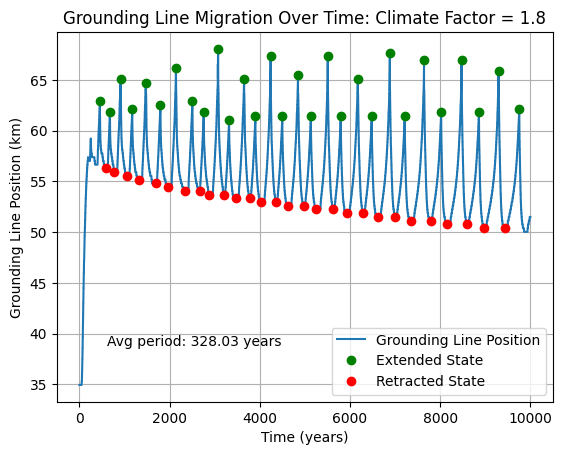

Mean cycle period: 328.03 years
[189.56831157 288.28760153 261.5556316  369.11192938 281.30102167
 375.06450552 316.84451578 203.43064122 330.32309488 270.31455226
 309.98393194 247.01469398 334.23091938 270.46597174 342.74391977
 273.43170727 377.43400562 305.41331274 358.7773419  326.44637054
 386.39202899 354.68990743 429.05858468 359.32809915 441.04934388
 381.94543467 472.68983028]
Mean advance amplitude: 63.85 km
[62.909699   61.80602007 65.11705686 62.17391304 64.74916388 62.54180602
 66.22073579 62.909699   61.80602007 68.06020067 61.07023411 65.11705686
 61.43812709 67.32441472 61.43812709 65.48494983 61.43812709 67.32441472
 61.43812709 65.11705686 61.43812709 67.69230769 61.43812709 66.95652174
 61.80602007 66.95652174 61.80602007 65.85284281 62.17391304]
Mean retreat amplitude: 52.91 km
[56.28762542 55.91973244 55.55183946 55.18394649 54.81605351 54.44816054
 54.08026756 54.08026756 53.71237458 53.71237458 53.34448161 53.34448161
 52.97658863 52.97658863 52.60869565 52.6086

In [190]:
cf_18_peaks, _ = find_peaks(GL_km_cf_18, prominence=3) 
cf_18_troughs, _ = find_peaks(-GL_km_cf_18, prominence=3)     
cf_18_periods = np.diff(np.array(time)[cf_18_troughs])
cf_18_adv_dists = GL_km_cf_18[cf_18_peaks]
cf_18_ret_dists = GL_km_cf_18[cf_18_troughs]


plt.plot(time, GL_km_cf_18, label='Grounding Line Position')
plt.plot(np.array(time)[cf_18_peaks], GL_km_cf_18[cf_18_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_18_troughs], GL_km_cf_18[cf_18_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_18_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.8")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_18_periods):.2f} years")
print(cf_18_periods)

print(f"Mean advance amplitude: {np.mean(cf_18_adv_dists):.2f} km")
print(cf_18_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_18_ret_dists):.2f} km")
print(cf_18_ret_dists)


Grounding Line plotting - Climate Factor 1.9

In [191]:
gl_run_title_cf19 = str("Grounding Line Evolution Over Time - Climate Factor = 1.9")
cf_19 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/cf_Tests/DATA_Dictionary_2025_04_26__18_53_16_CF19.pkl.gz"
with gzip.open(cf_19, 'rb') as f:
    DATA_dict_cf_19 = pickle.load(f)

In [192]:
bed_dict = DATA_dict_cf_19['bed_dict']
base_dict = DATA_dict_cf_19['base_dict']
surf_dict= DATA_dict_cf_19 ['surf_dict']
sed_dict = DATA_dict_cf_19['sed_dict']
H_dict = DATA_dict_cf_19['H_dict']
us_dict = DATA_dict_cf_19['us_dict']
ub_dict = DATA_dict_cf_19['ub_dict']
Hs_dict = DATA_dict_cf_19['Hs_dict']
GL_dict = DATA_dict_cf_19['GL_dict']
Qs_dict = DATA_dict_cf_19['Qs_dict']
final_time = list(GL_dict)[-1]
print(final_time)

10000.005611654018


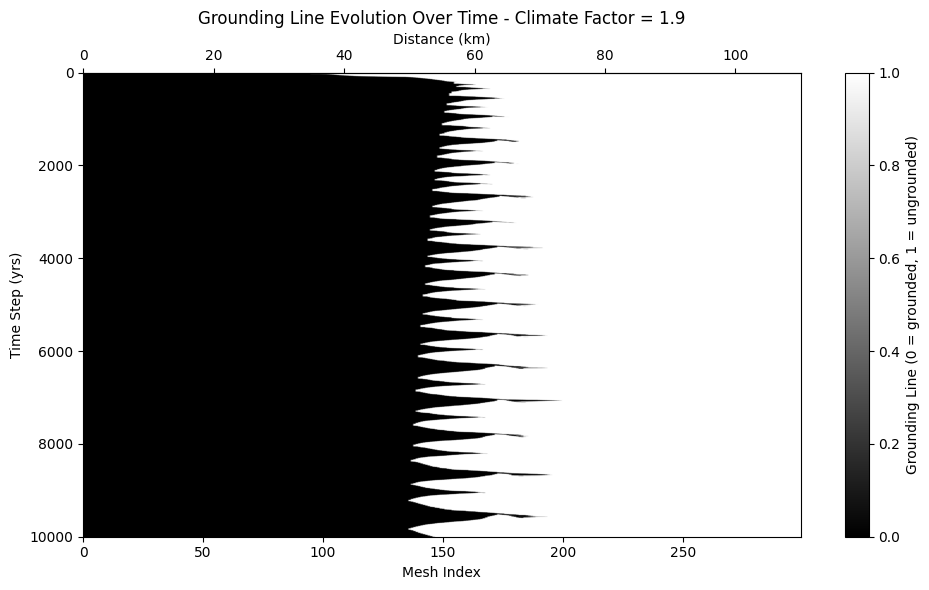

In [193]:
GL_dict = DATA_dict_cf_19['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cf19)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [194]:
gl_positions_cf_19 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cf_19.append(idx)

gl_positions_cf_19 = np.array(gl_positions_cf_19)
GL_km_cf_19 = mesh_index_to_km(gl_positions_cf_19)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_cf_19 = GL_km_cf_19[mask]


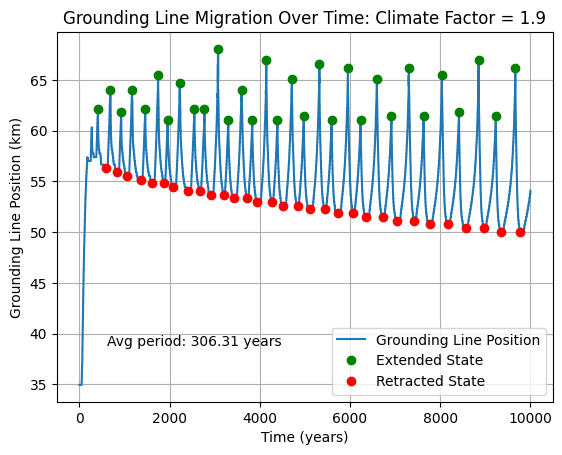

Mean cycle period: 306.31 years
[252.1999564  221.02663837 314.26439292 249.17630488 261.43381193
 196.04355825 342.88027713 259.68875259 232.29039668 289.8833561
 218.96463445 305.20426456 222.09136326 332.37441022 237.28175908
 321.45820511 268.56599691 349.83234872 269.38565396 340.25870879
 282.63732115 379.99664288 316.73926661 375.75311633 346.18114469
 406.51388869 393.50062721 400.85458176 381.23492373 421.70226131]
Mean advance amplitude: 63.54 km
[62.17391304 64.01337793 61.80602007 64.01337793 62.17391304 65.48494983
 61.07023411 64.74916388 62.17391304 62.17391304 68.06020067 61.07023411
 64.01337793 61.07023411 66.95652174 61.07023411 65.11705686 61.43812709
 66.58862876 61.07023411 66.22073579 61.07023411 65.11705686 61.43812709
 66.22073579 61.43812709 65.48494983 61.80602007 66.95652174 61.43812709
 66.22073579]
Mean retreat amplitude: 52.79 km
[56.28762542 55.91973244 55.55183946 55.18394649 54.81605351 54.81605351
 54.44816054 54.08026756 54.08026756 53.71237458 53.71

In [195]:
cf_19_peaks, _ = find_peaks(GL_km_cf_19, prominence=3) 
cf_19_troughs, _ = find_peaks(-GL_km_cf_19, prominence=3)     
cf_19_periods = np.diff(np.array(time)[cf_19_troughs])
cf_19_adv_dists = GL_km_cf_19[cf_19_peaks]
cf_19_ret_dists = GL_km_cf_19[cf_19_troughs]


plt.plot(time, GL_km_cf_19, label='Grounding Line Position')
plt.plot(np.array(time)[cf_19_peaks], GL_km_cf_19[cf_19_peaks], 'go', label='Extended State')
plt.plot(np.array(time)[cf_19_troughs], GL_km_cf_19[cf_19_troughs], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(cf_19_periods):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Climate Factor = 1.9")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(cf_19_periods):.2f} years")
print(cf_19_periods)

print(f"Mean advance amplitude: {np.mean(cf_19_adv_dists):.2f} km")
print(cf_19_adv_dists)

print(f"Mean retreat amplitude: {np.mean(cf_19_ret_dists):.2f} km")
print(cf_19_ret_dists)


## Relationship Plots

In [207]:
## Climate Factor##
title_CF_cycles = str("Number of Cycles Produced  VS Climate Factor Coefficient")
CFs = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
CF_cycles = np.array([0, 0, 0, 0, 0, 1, 2, 5, 6, 10, 13, 16, 19, 20, 22, 26, 27, 28, 31])

CF_coeff = np.polyfit(CFs[5:],CF_cycles[5:], 1)
p_CF = np.poly1d(CF_coeff)
CF_y_trend = p_CF(CFs[5:])
R_2_CF =r2_score(CF_cycles,p_CF(CFs))


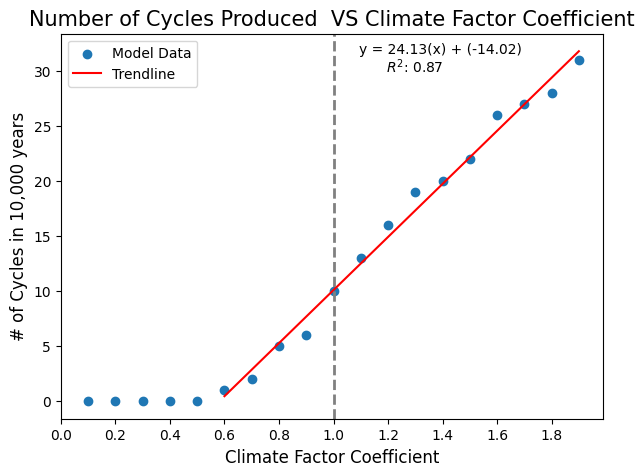

In [209]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.scatter(CFs, CF_cycles, label = 'Model Data')
plt.title(title_CF_cycles, fontsize = 15)
plt.plot(CFs[5:], CF_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_CF:.2f}', transform=plt.gca().transAxes)
plt.text(0.55, 0.95, f'y = {CF_coeff[0]:.2f}(x) + ({CF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.axvline(x=1.0, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Climate Factor Coefficient", fontsize = 12)
plt.ylabel("# of Cycles in 10,000 years", fontsize = 12)
plt.xticks(np.arange(0, 1.9, 0.2))
plt.legend()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/#Cycles_CF.svg", format ="svg", bbox_inches='tight')

## Box & Whisker Plots

Variations in Cycle Period

In [198]:
cfs = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

Period_list = [cf_07_periods, cf_08_periods, cf_09_periods, cf_10_periods, cf_11_periods, cf_12_periods, cf_13_periods, cf_14_periods, cf_15_periods, cf_16_periods, cf_17_periods, cf_18_periods, cf_19_periods]


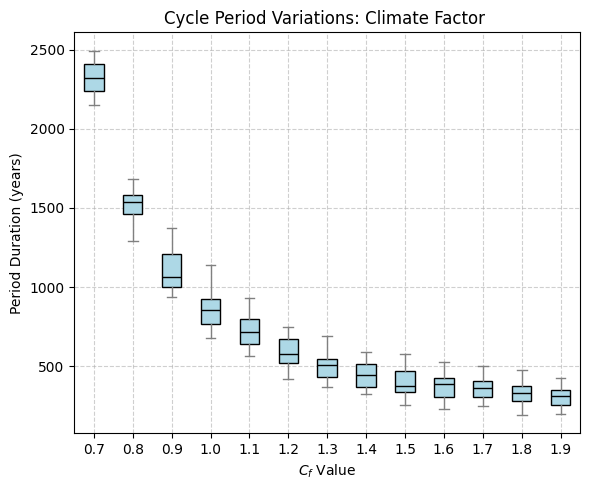

In [199]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations: Climate Factor ")
ax.set_ylabel("Period Duration (years)")
ax.set_xlabel("$C_f$ Value")
ax.set_xticks(np.arange(1, len(cfs) + 1))
ax.set_xticklabels(cfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/Period_Variation_CF.svg", format ="svg", bbox_inches='tight')

Variations in GL Extent - Advance 

In [200]:
cfs = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
ExtPos_list = [cf_07_adv_dists, cf_08_adv_dists, cf_09_adv_dists, cf_10_adv_dists, cf_11_adv_dists, cf_12_adv_dists, cf_13_adv_dists, cf_14_adv_dists, cf_15_adv_dists, cf_16_adv_dists, cf_17_adv_dists, cf_18_adv_dists, cf_19_adv_dists]


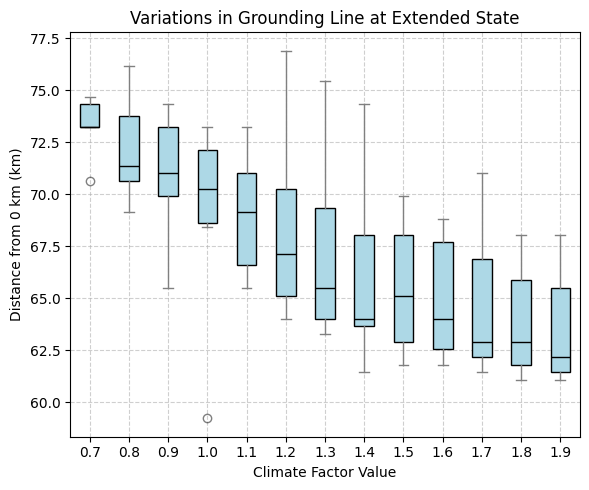

In [201]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line at Extended State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Climate Factor Value")
ax.set_xticks(np.arange(1, len(cfs) + 1))
ax.set_xticklabels(cfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_Adv_GL_Variations.jpg")

Variations in GL Extent - Retreat 

In [202]:
cfs = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
RetPos_list = [cf_07_ret_dists, cf_08_ret_dists, cf_09_ret_dists, cf_10_ret_dists, cf_11_ret_dists, cf_12_ret_dists, cf_13_ret_dists, cf_14_ret_dists, cf_15_ret_dists, cf_16_ret_dists, cf_17_ret_dists, cf_18_ret_dists, cf_19_ret_dists]

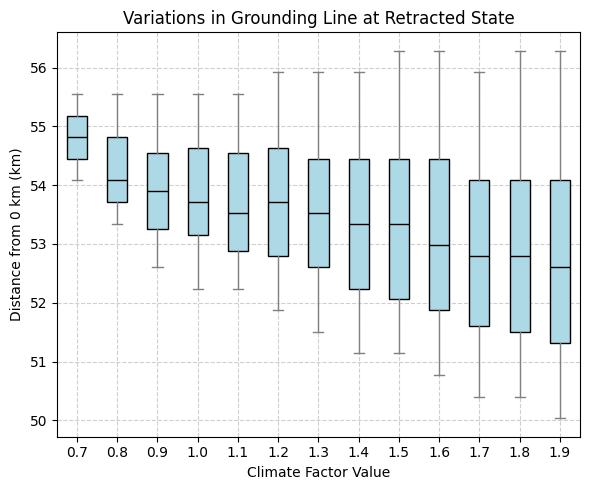

In [203]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Climate Factor Value")
ax.set_xticks(np.arange(1, len(cfs) + 1))
ax.set_xticklabels(cfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_Ret_GL_Variations.jpg")

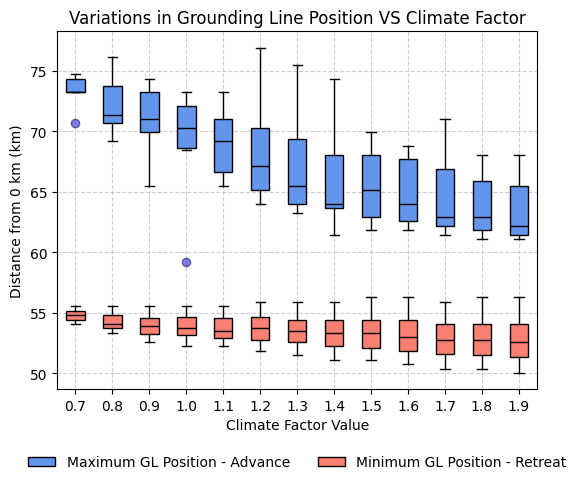

In [211]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='salmon', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='cornflowerblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='blue', alpha=0.5))

ax.set_title("Variations in Grounding Line Position VS Climate Factor")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Climate Factor Value")
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(cfs) + 1))
ax.set_xticklabels(cfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/GLVariation_CF.svg", format ="svg", bbox_inches='tight')